# Sprint 2 Task 5 (S02_T05)

Author: *Alberto Achaval*

## Level 1 

### Practice 1

In [2]:
# Import Pandas, NumPy, Matplotlib an read de dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
airlines_delay = pd.read_csv('DelayedFlights.csv') # read dataset

In [4]:
airlines_delay.head(3) # first 3 rows of the dataframe

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines_delay.tail() # last 5 rows of the dataframe

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,...,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
airlines_delay.shape # shape property to see how many rows and columns we have

(1936758, 30)

In [7]:
airlines_delay.info() # the info() method prints information about a DataFrame including the index dtype and columns 
# and memory usage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

**Dataframe column cleaning:** I'm going to store a reduced dataframe version without irrelevant columns for this exercise purpose.
The columns I'm picking are the ones I think I need for Practice 2 of this notebook. Nevertheless, I'm making a copy
and it wolud be possible to go back and select more columns if needed.

In [8]:
selected_cols = airlines_delay[['Year', 'Month', 'DepTime', 'ArrTime', 'UniqueCarrier', 'FlightNum',
                                'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
                                'Dest', 'Distance']] # Dataframe with chosen columns for Practice 2 

airlines_delay_reduced = selected_cols.copy() # Make a copy of the dataframe only with selected columns
airlines_delay_reduced.head()


,Year,Month,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,2003.0,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810
1,2008,1,754.0,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810
2,2008,1,628.0,804.0,WN,448,96.0,76.0,14.0,8.0,IND,BWI,515
3,2008,1,1829.0,1959.0,WN,3920,90.0,77.0,34.0,34.0,IND,BWI,515
4,2008,1,1940.0,2121.0,WN,378,101.0,87.0,11.0,25.0,IND,JAX,688


### Practice 2

In [9]:
# Dataframe exploring

airlines_delay_reduced.describe() # Generate descriptive statistics. Descriptive statistics include those that summarize 
# the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,Year,Month,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,1936758.0,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06
mean,2008.0,6.111106e+00,1.518534e+03,1.610141e+03,2.184263e+03,1.333059e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02
std,0.0,3.482546e+00,4.504853e+02,5.481781e+02,1.944702e+03,7.206007e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01
25%,2008.0,3.000000e+00,1.203000e+03,1.316000e+03,6.100000e+02,8.000000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.545000e+03,1.715000e+03,1.543000e+03,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02
75%,2008.0,9.000000e+00,1.900000e+03,2.030000e+03,3.422000e+03,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02
max,2008.0,1.200000e+01,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03


In [10]:
# Missing values per column (NaN)

values_NaN = airlines_delay_reduced.isnull().sum() #This function takes a scalar or array-like object and indicates 
# whether values are missing and then it adds them with sum() function

print(values_NaN)

Year                    0
Month                   0
DepTime                 0
ArrTime              7110
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    8387
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
dtype: int64


We have a few missing values, let's see how many rows it would be:

In [11]:
airlines_delay_reduced.shape #1.936.758 rows including the ones that have NaN's, almost 2 millon rows

(1936758, 13)

In [12]:
# I make a copy of dataframe without NaN values and check how many rows are left.

airlines_delay_reduced_nonan = airlines_delay_reduced.dropna(axis = 0, how ='any').copy() # If there's a NaN, eliminate
# the whole row
airlines_delay_reduced_nonan.shape #1.928.371 rows without NaN's


(1928371, 13)

In [13]:
# Check results

print(round(100 * (airlines_delay_reduced.shape[0] - airlines_delay_reduced_nonan.shape[0]) / 
            (airlines_delay_reduced.shape[0]),2), '% of the rows are being left aside.') 


0.43 % of the rows are being left aside.


**The number of rows being dropped is less than 0,5% of the Dataframe and we have almost 2 millon rows so I think we 
could get rid of NaN's this way. Maybe it's not the best way (we could estimate the missing values with mean, median, scalar) but in this case I think it makes no difference.**

In [14]:
airlines_delay_reduced_nonan.describe() # Generate descriptive statistics

,Year,Month,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,1928371.0,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,2008.0,6.107855e+00,1.518648e+03,1.610242e+03,2.184296e+03,1.333059e+02,1.082771e+02,4.219988e+01,4.309169e+01,7.649486e+02
std,0.0,3.480753e+00,4.504352e+02,5.480009e+02,1.944450e+03,7.206007e+01,6.864261e+01,5.678472e+01,5.326600e+01,5.738858e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01
25%,2008.0,3.000000e+00,1.203000e+03,1.316000e+03,6.110000e+02,8.000000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.545000e+03,1.715000e+03,1.543000e+03,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02
75%,2008.0,9.000000e+00,1.900000e+03,2.030000e+03,3.423000e+03,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02
max,2008.0,1.200000e+01,2.400000e+03,2.400000e+03,9.741000e+03,1.114000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03


If we compare this ***airlines_delay_reduced_nonan.describe()*** with the previous ***airlines_delay_reduced.describe()*** a couple of cells above, we could see that all the values of the numeric variables (mean, std, percentiles) are practically the same number in both cases. This indicates that dropping the NaN's so drastically is not an problem in this case. 

From this chart we can see the flights distribution per airline for year 2008. WN carrier had the majority of flights during this year with over 350.000 flights, almost two times the second one AA. 

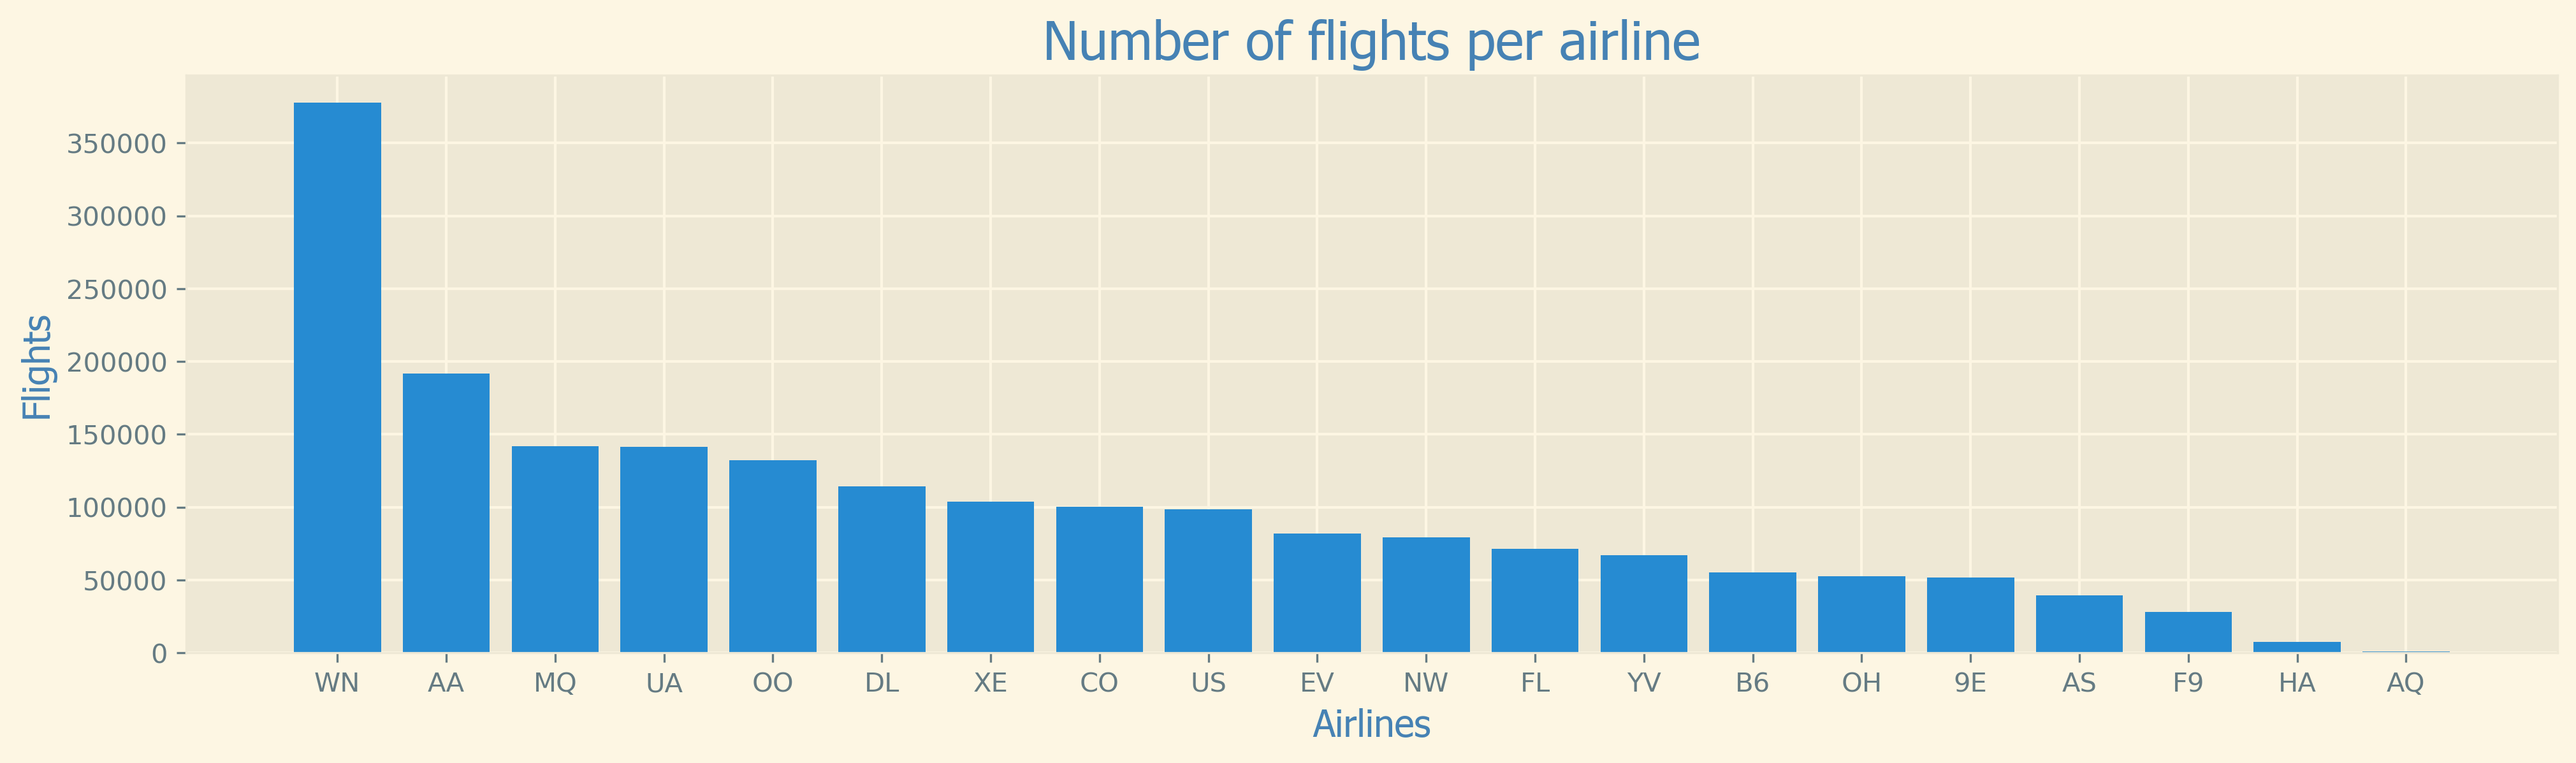

In [15]:
# Create a new columns with the Average Speed of Air Time for year 2008

airlines_delay_reduced_nonan['AvgSpeed'] = airlines_delay_reduced_nonan['Distance'] / airlines_delay_reduced_nonan['AirTime']
airlines_delay_reduced_nonan[['UniqueCarrier', 'AvgSpeed', 'Distance', 'AirTime']].head(10)

,UniqueCarrier,AvgSpeed,Distance,AirTime
0,WN,6.982759,810,116.0
1,WN,7.168142,810,113.0
2,WN,6.776316,515,76.0
3,WN,6.688312,515,77.0
4,WN,7.908046,688,87.0
5,WN,6.917391,1591,230.0
6,WN,7.811321,828,106.0
7,WN,7.738318,828,107.0
8,WN,4.378378,162,37.0
9,WN,6.990610,1489,213.0


Let's do a graph with Average Speed per Unique Carrier in order to compare this variable.

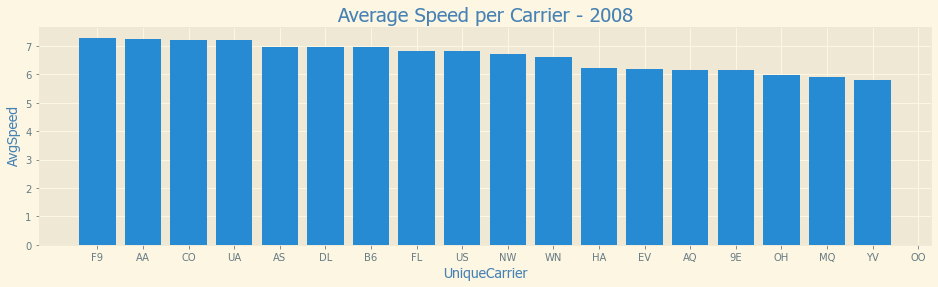

In [19]:
# Numeric and categorical variable display: UniqueCarrier and AvgSpeed

# Common style parametres for all charts

fig_size = (16,4) # size of the chart
font_title = {'family' : 'Tahoma', 'color' : 'steelblue', 'size' : 20} # font title dictionary
font_axis = {'family' : 'Tahoma', 'color' : 'steelblue', 'size' : 14} # font axis dictionary


# Prepare data
df1 = airlines_delay_reduced_nonan.groupby('UniqueCarrier')['AvgSpeed'].mean().sort_values(ascending = False).to_dict() # Python dictionary

x1 = list(df1.keys())
y1 = list(df1.values())

# Create plot
fig, ax = plt.subplots(figsize = fig_size)
ax.bar(x1,y1) # Horizontal bars chart

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Average Speed per Carrier - 2008', fontdict = font_title )
ax.set_ylabel('AvgSpeed', fontdict = font_axis)
ax.set_xlabel('UniqueCarrier', fontdict = font_axis)


# Show and save plot
plt.show()


Although F9 and AA travel faster on average, there is not much dispersion between the airlines. 

In [20]:
# Has it been delayed? false or true

airlines_delay_reduced_nonan['Delayed'] = airlines_delay_reduced_nonan['ArrDelay'] > 0 # New column with boolean values
airlines_delay_reduced_nonan[['ArrDelay', 'Delayed']].head(10)

,ArrDelay,Delayed
0,-14.0,False
1,2.0,True
2,14.0,True
3,34.0,True
4,11.0,True
5,57.0,True
6,1.0,True
7,80.0,True
8,11.0,True
9,15.0,True


In the following graph we can see the total time that each airline has been delayed in its arrival during the year 2008. In the second graph we can see the amount of time that has passed in each ArrDelay on average. While WN was the longest delayed airline, each ArrDelay was approximately 30 minutes, while B6 is approximately 60 minutes each delay.

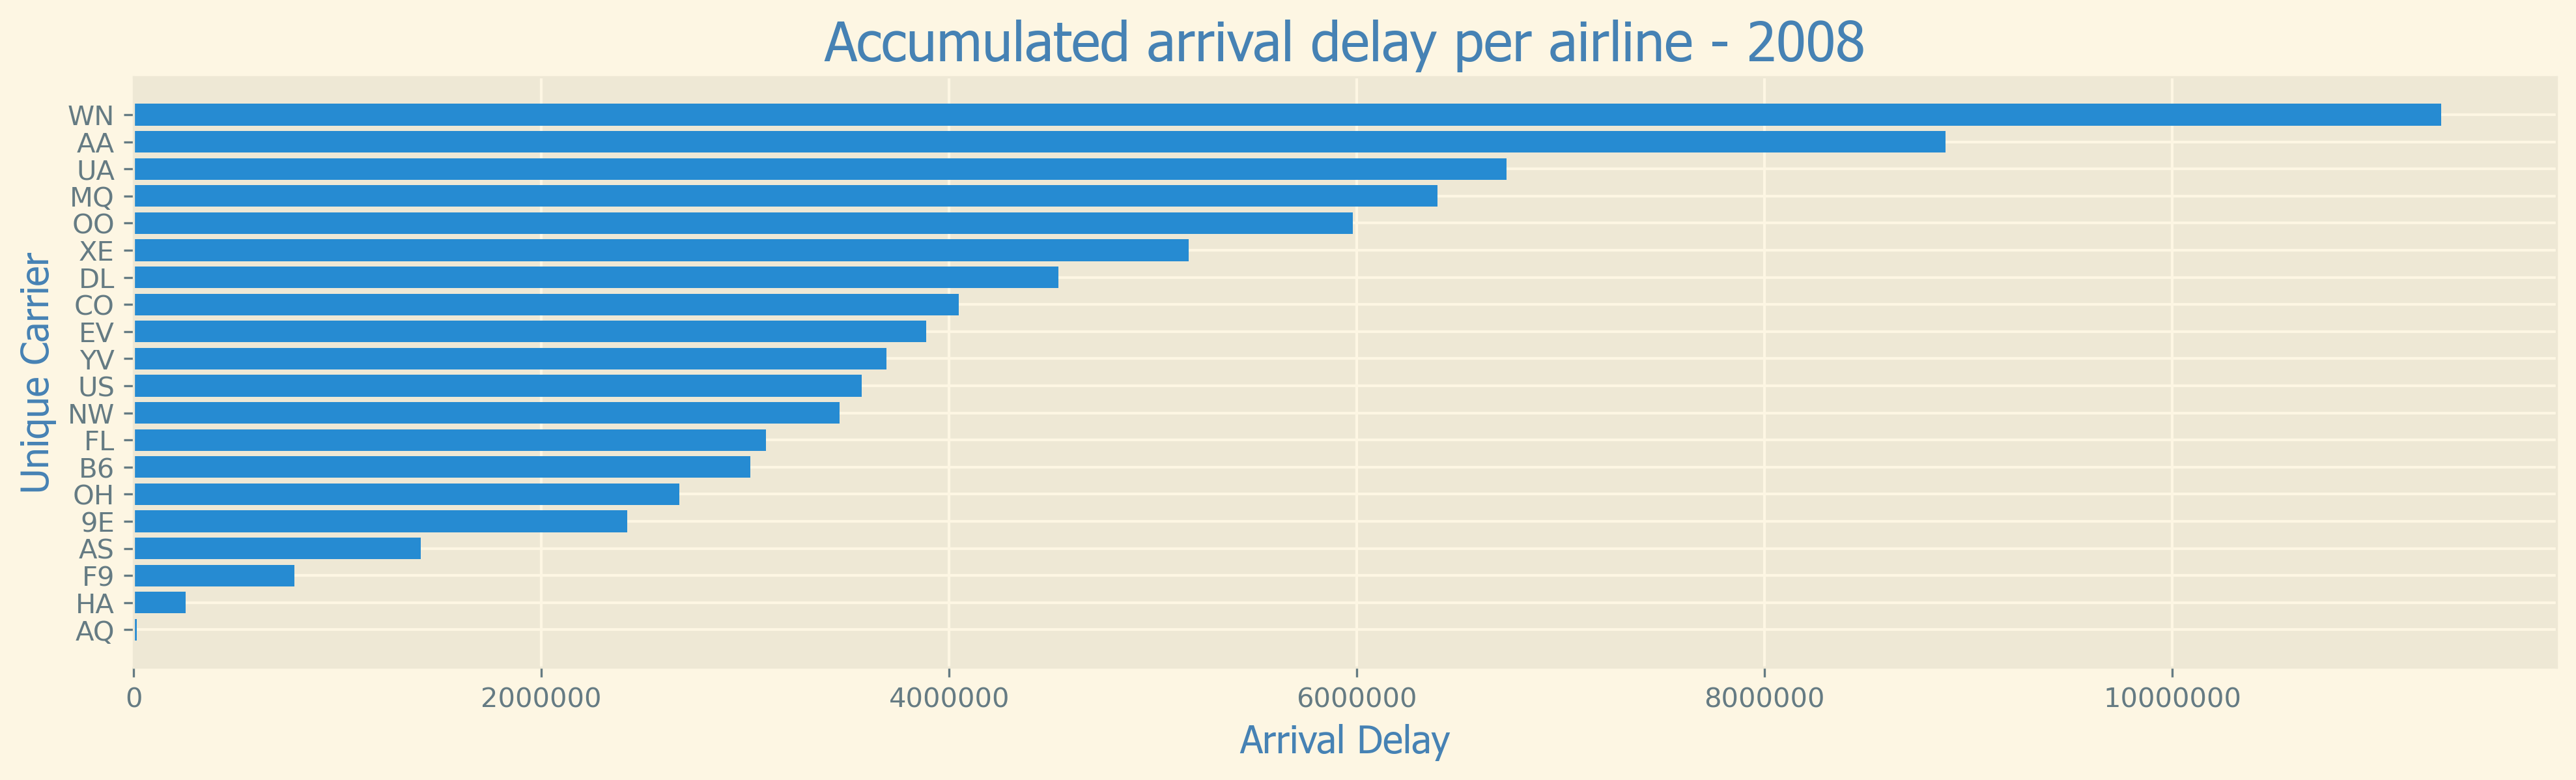

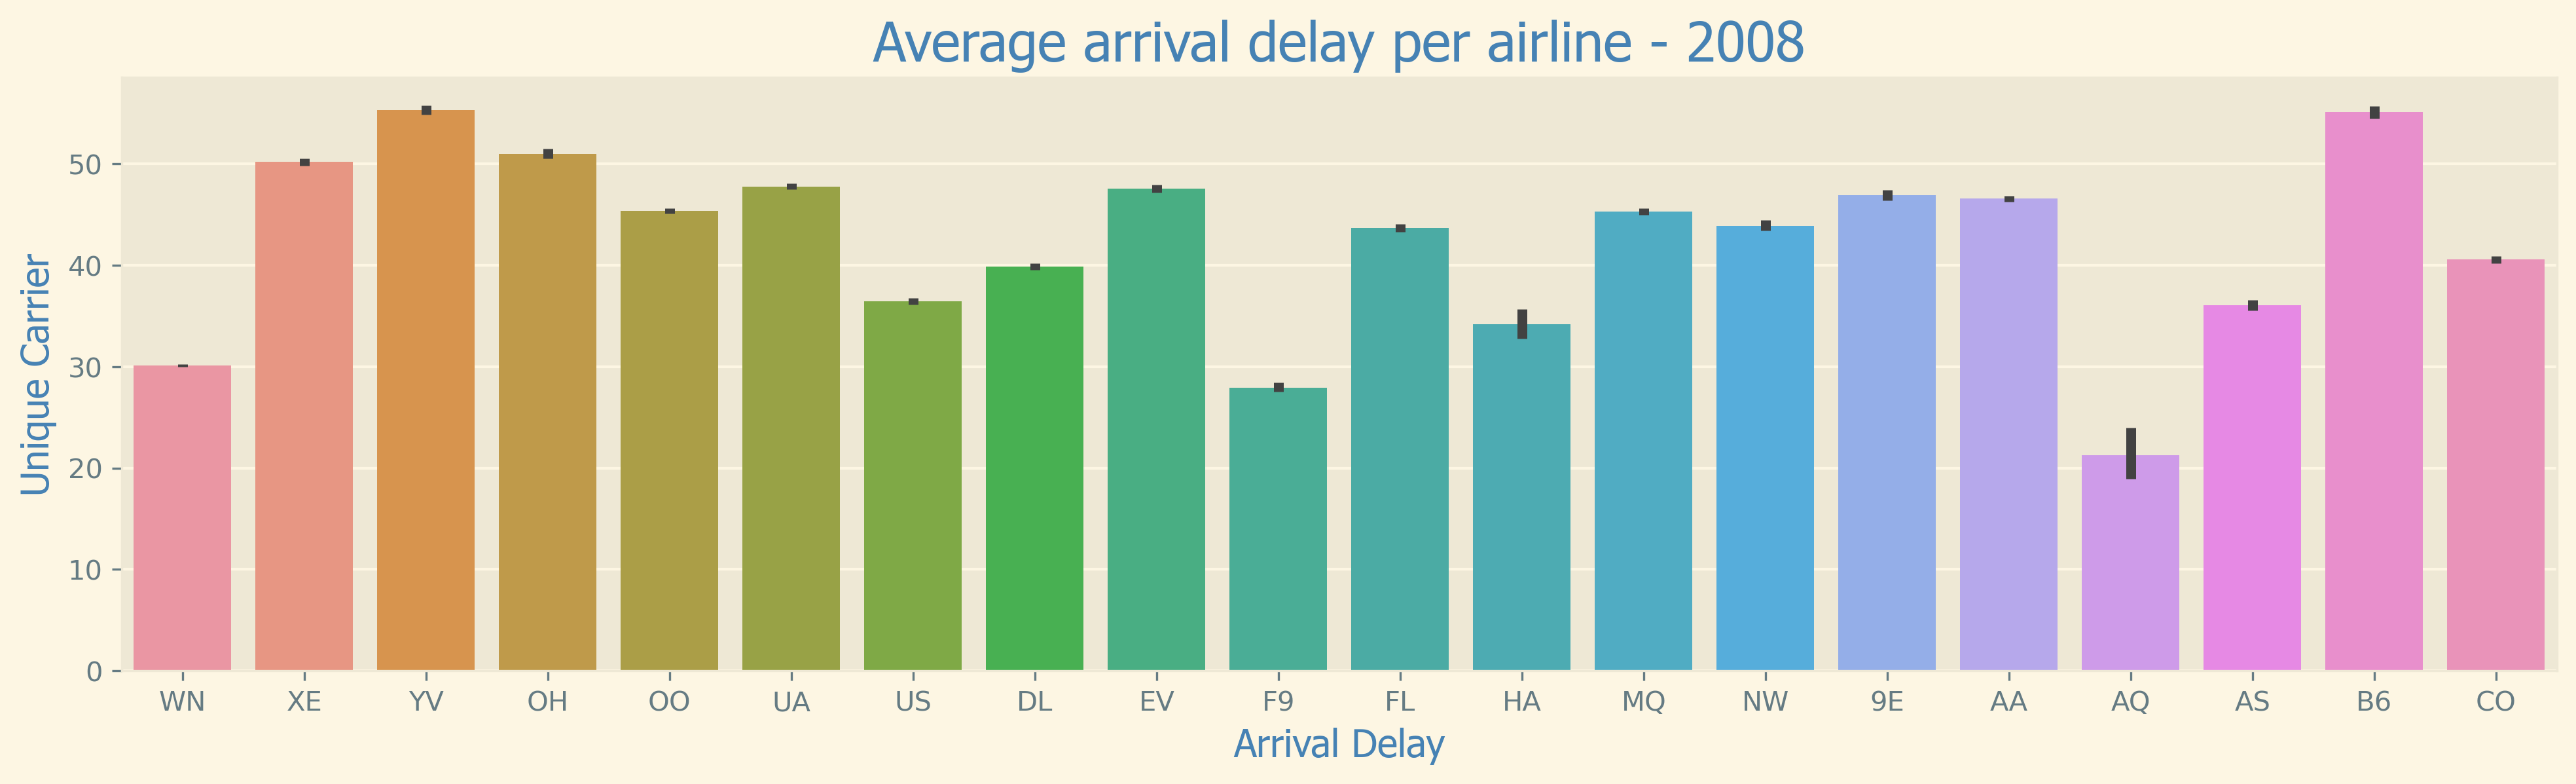

In [21]:
# Airline with most accumulated delays

# New column with Departure + Arrival delay
airlines_delay_reduced_nonan['TotalDelay'] = airlines_delay_reduced_nonan['ArrDelay'] + airlines_delay_reduced_nonan['DepDelay']

# Group by airline and sum total delay. Then sort from max to min and show top three
airline_most_delay = airlines_delay_reduced_nonan.groupby('UniqueCarrier')['TotalDelay'].sum().sort_values(ascending = False)
airline_most_delay.head(3)

UniqueCarrier
WN    24331347.0
AA    17746439.0
UA    13764664.0
Name: TotalDelay, dtype: float64

**YV airline is more often delayed than on air.**

In this next displays it's clear the strong correlation between Arrival Delay and Departure Delay per Unique Carrier, even more for delays longer than 500 min were dots are almost lined up (Arrival Delay vs. Departure Delay scatter plot). I think this could be true as a very delayed arrival will impact in a very delayed departure. 

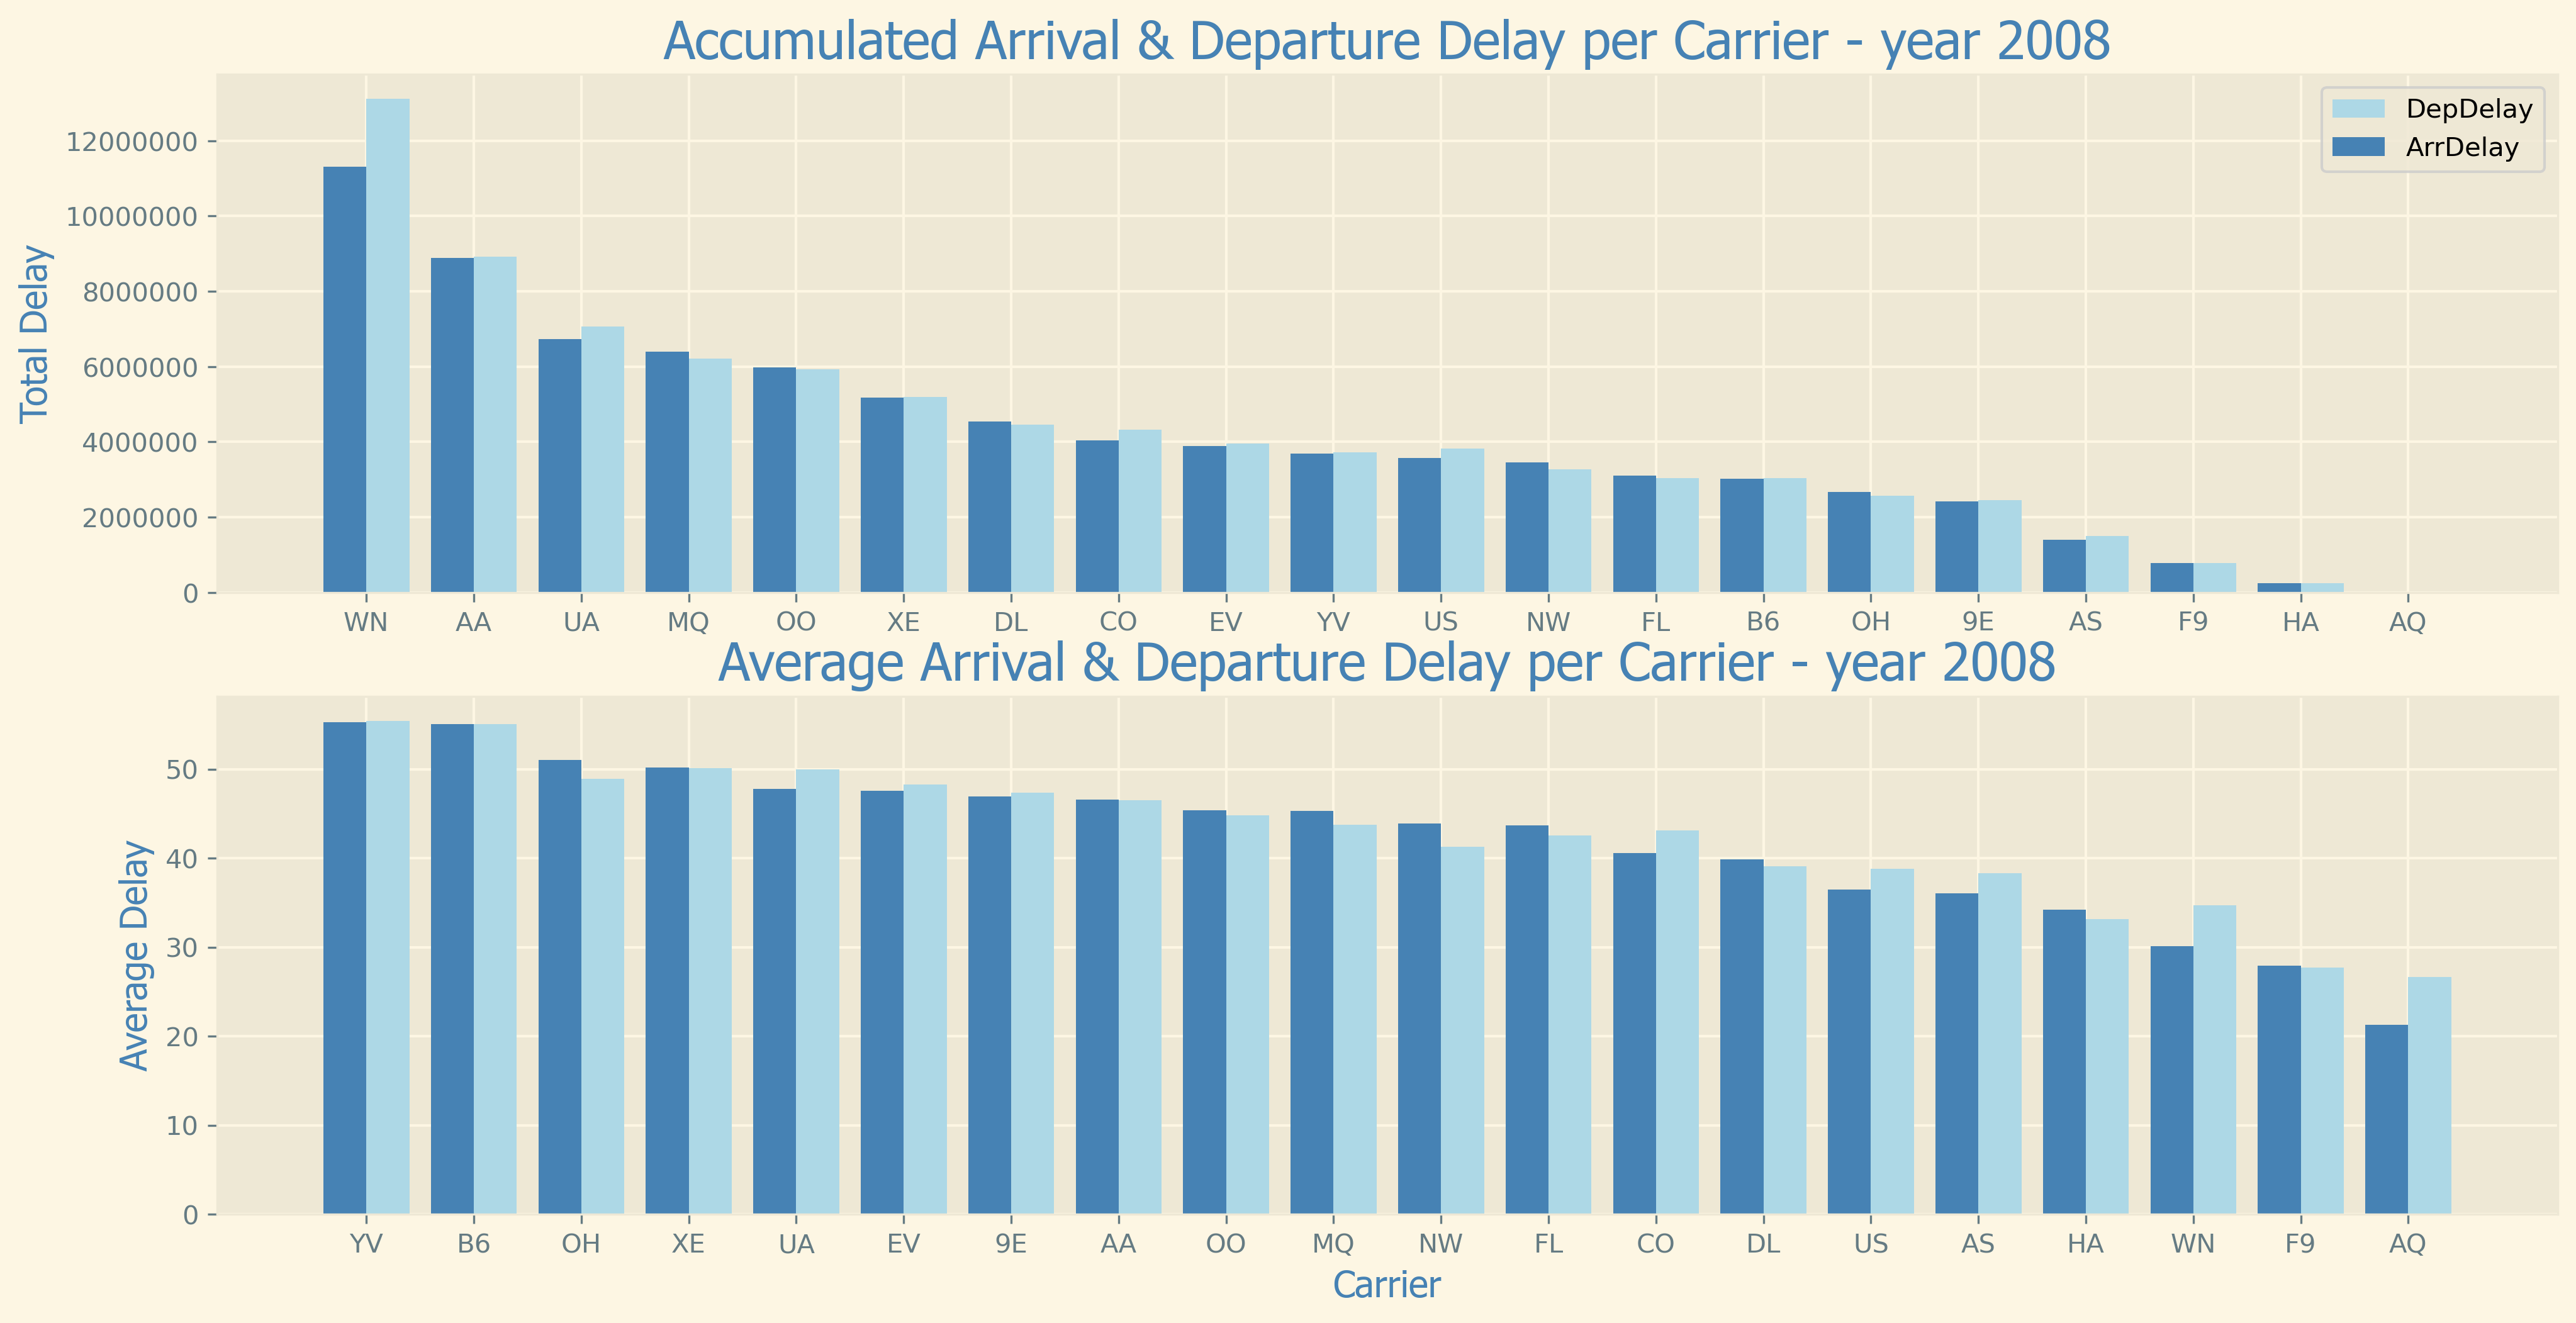

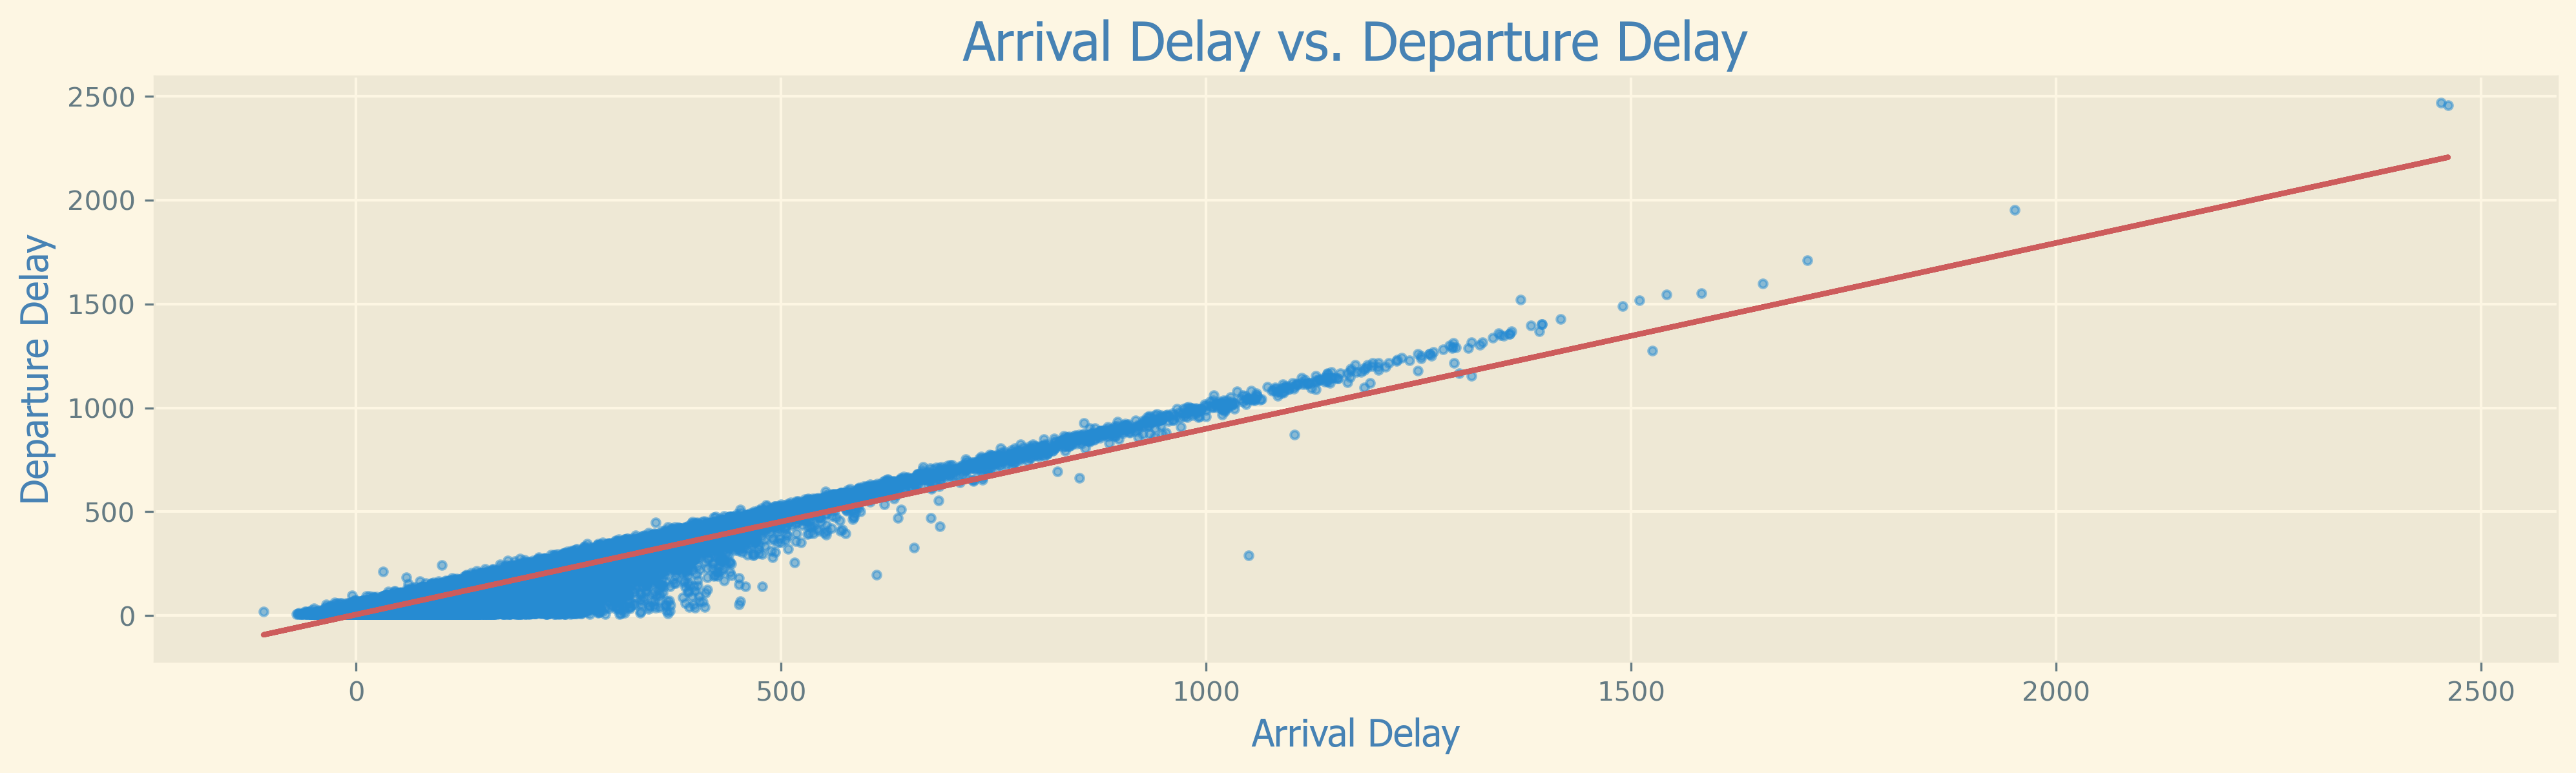

In [22]:
# Longest flights

# Sort by Air Time
longest_flights = airlines_delay_reduced_nonan.sort_values(by = "AirTime", ascending=False)
longest_flights[['UniqueCarrier', 'FlightNum', 'AirTime']].head(10)


,UniqueCarrier,FlightNum,AirTime
1488690,HA,21,1091.0
1367047,HA,28,733.0
362529,CO,15,664.0
556381,CO,15,655.0
556385,CO,15,654.0
556379,CO,15,654.0
556377,CO,15,652.0
556386,CO,15,651.0
362852,CO,15,649.0
363750,CO,15,648.0


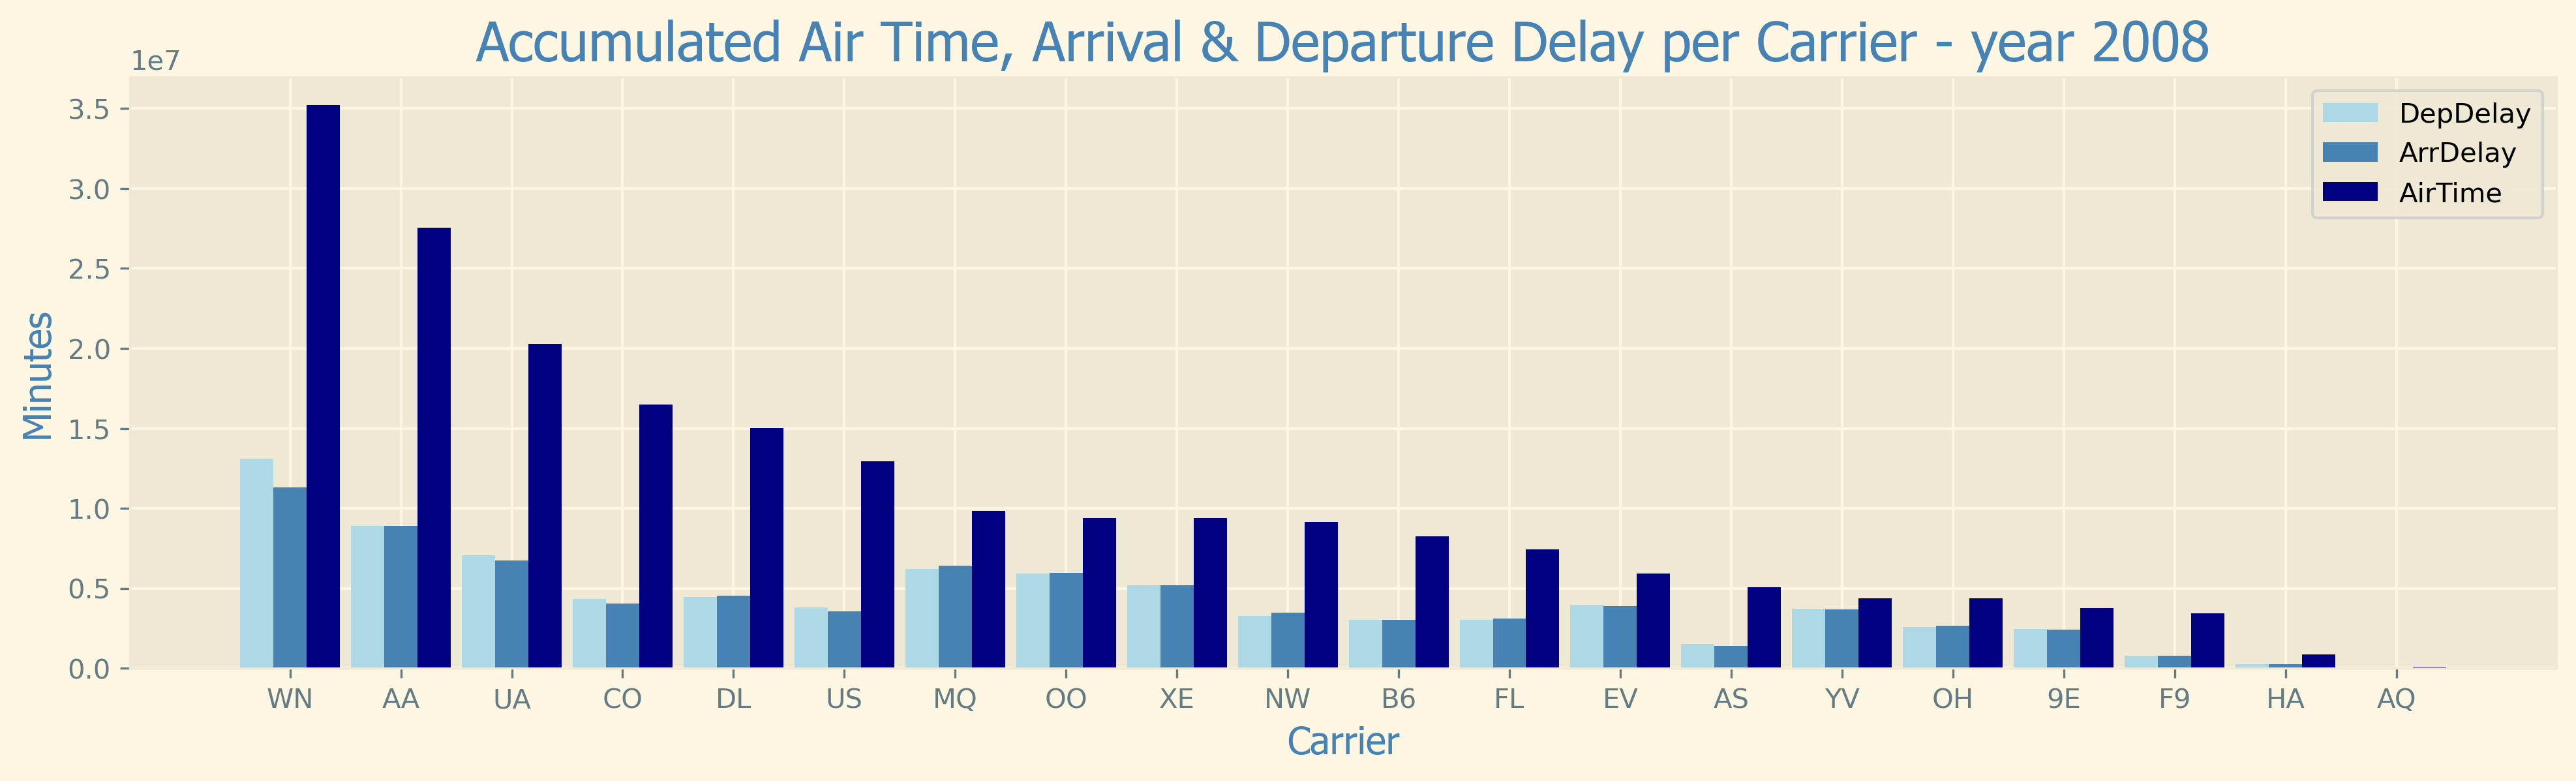

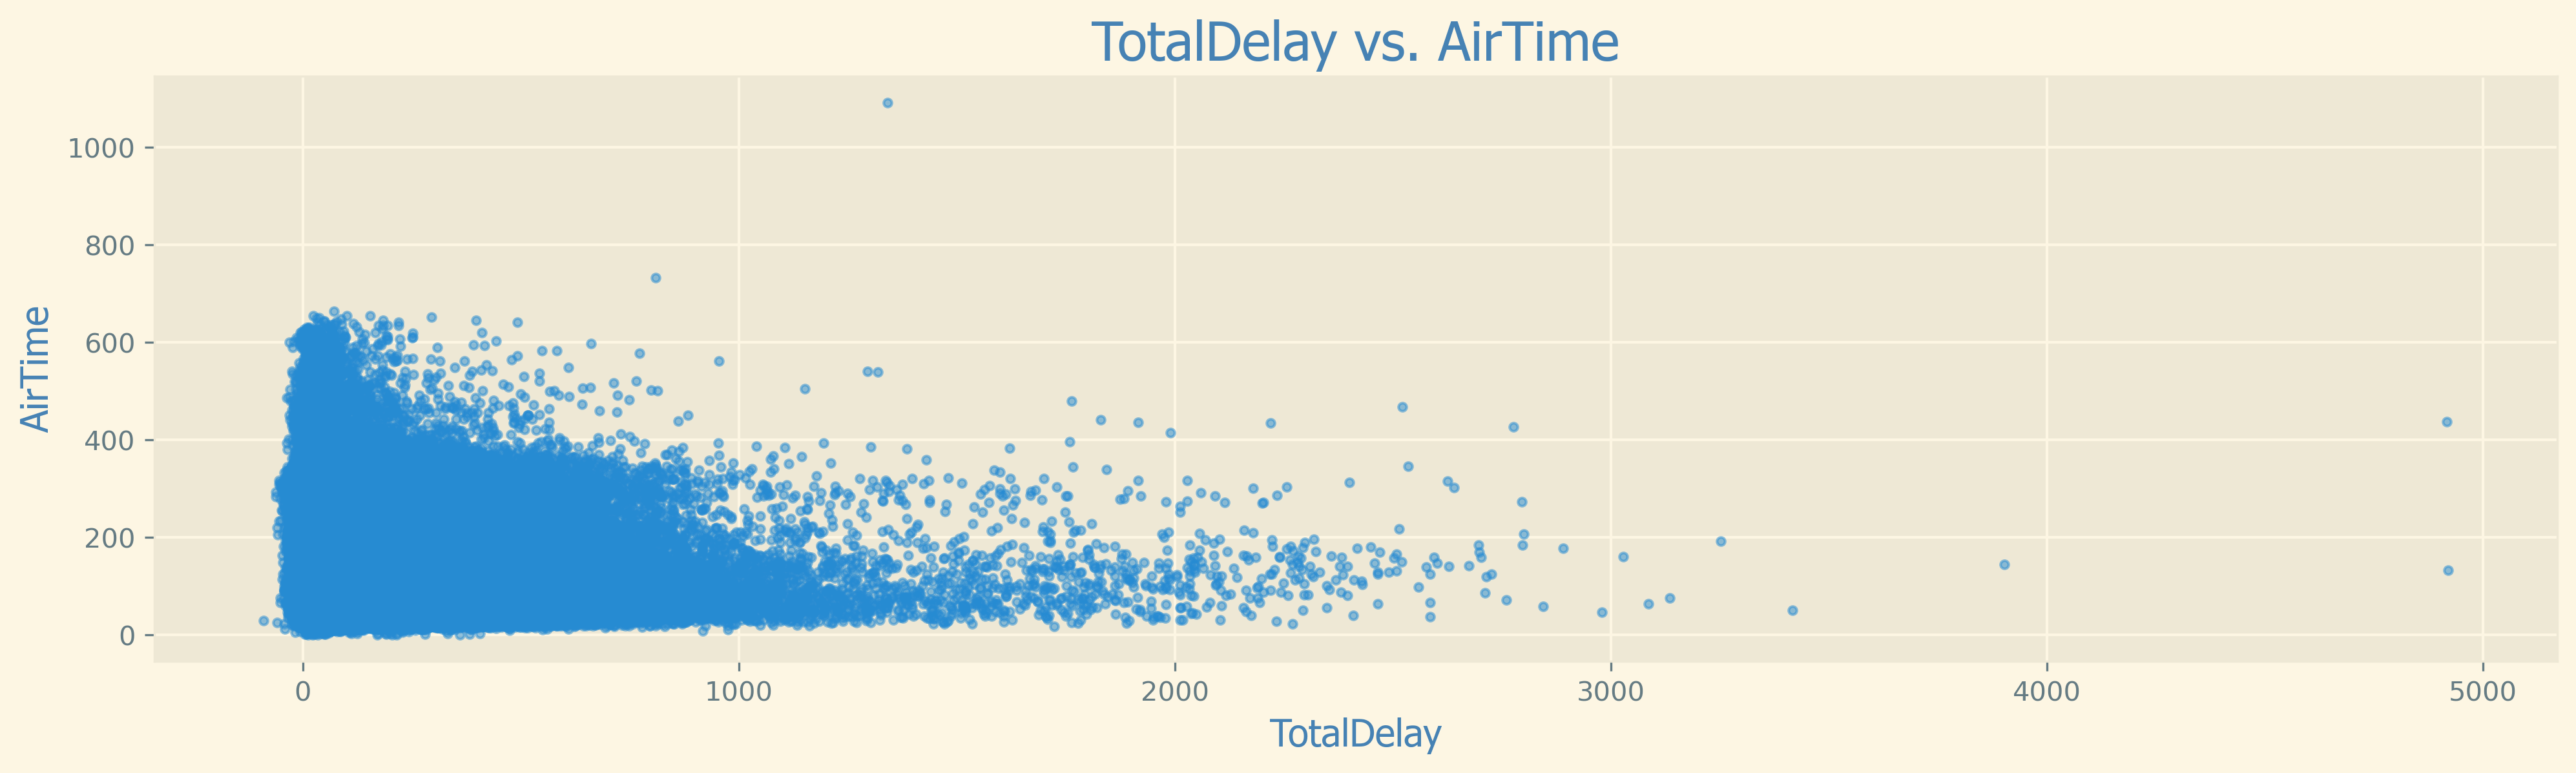

In [23]:
airlines_delay_reduced_nonan[['TotalDelay', 'AirTime']].corr()

,TotalDelay,AirTime
TotalDelay,1.000000,-0.001447
AirTime,-0.001447,1.000000


We have almost 0. A value of 0 implies that there is no linear dependence between the variables. With this we can rule out the hypothesis that the greater the delay, the faster the pilot would fly.

In [24]:
# Most delayed flights

# Sort by total delay
most_delayed_flights = airlines_delay_reduced_nonan.sort_values(by = "TotalDelay", ascending=False) # Sort by total delay

most_delayed_flights[['UniqueCarrier', 'FlightNum', 'AvgSpeed', 'TotalDelay']].head(10)

,UniqueCarrier,FlightNum,AvgSpeed,TotalDelay
686014,NW,1699,7.045455,4920.0
322516,NW,808,9.089245,4918.0
839306,NW,1107,7.482759,3903.0
1009553,MQ,3538,6.080000,3417.0
1881639,NW,357,5.854167,3252.0
1497823,NW,512,3.760000,3135.0
685437,NW,1472,7.126984,3087.0
1214839,NW,804,8.743750,3028.0
521096,NW,1743,4.255319,2980.0
545038,AA,2093,6.197740,2891.0


### Practice 3

In [25]:
 # Export new dataset to Excel

# I split the dataframe as it has too many rows
# airlines_delay_reduced_nonan1 = airlines_delay_reduced_nonan[1:1000000]  
# airlines_delay_reduced_nonan2 = airlines_delay_reduced_nonan[1000001:]

# Then export to excel into two sheets same archive
# with pd.ExcelWriter("airlines_delay_reduced_nonan.xlsx") as writer:
#     airlines_delay_reduced_nonan1.to_excel(writer, sheet_name="Sheet1")
#     airlines_delay_reduced_nonan2.to_excel(writer, sheet_name="Sheet2")